In [ ]:
Линейный график (lineplot)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)

sns.lineplot()

Основные параметры:
1) data: DataFrame или массив с данными;
2) x: название столбца или вектор данных для оси X;
3) y: название столбца или вектор данных для оси Y;

1) ci: отображение доверительного интервала (аналог errorbar=None);
2) marker: задает форму точек (маркеров);
3) markersize: задает размер точек (маркеров);
4) markerfacecolor: задает цвет маркеров;
5) color: задает цвет линии у графика;
6) palette: цветовая палитра для переменной hue;
7) linewidth (lw): задает толщину линии у графика;
8) alpha: задает прозрачность линии у графика;
9) hue: задает дополнительное измерение c помощью разных цветов (название столбца или вектор данных для группировки точек по цвету);
10) hue_order: задаёт порядок отображения категорий для переменной hue;
11) size: название столбца или вектор данных для изменения размера точек;
12) sizes: диапазон размеров для переменной size;
13) size_order: задаёт порядок отображения категорий для переменной size;
14) estimator: задает метод агрегации;
15) n_boot: задает количество создаваемых бутстрап-выборок для построения доверительного интервала (ci)
16) seed: задает воспроизводимость результатов бутстрап-выборок

In [4]:
exercise = sns.load_dataset('exercise').dropna()
exercise = exercise.drop('Unnamed: 0', axis=1)

display(exercise.head())
#display(exercise.info())

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


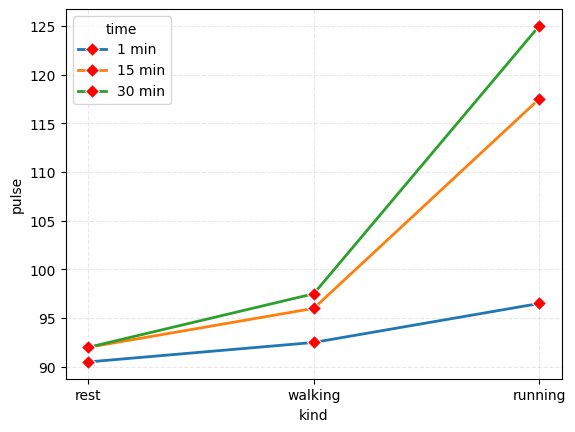

In [6]:
sns.lineplot(x='kind', y='pulse', data=exercise, 
             errorbar=None, 
             marker = 'D', 
             markersize = 7,
             markerfacecolor='red',
             lw = 2,
             color = 'k',
             hue = 'time',
             estimator = 'median')

plt.grid(linestyle='--', alpha=0.5, color = 'lightgrey');
plt.show()

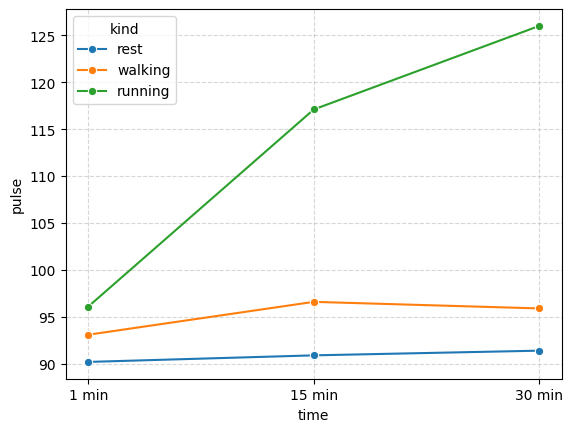

In [8]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind',
             errorbar=None,
             marker='o')

plt.grid(linestyle='--', alpha=0.5);

In [10]:
#Логика построения графика

data = exercise[(exercise['kind'] == 'running') & 
         (exercise['time'] == '15 min')] 
display(data)
print(data['pulse'].mean())

,id,diet,pulse,time,kind
61,21,low fat,98,15 min,running
64,22,low fat,104,15 min,running
67,23,low fat,105,15 min,running
70,24,low fat,132,15 min,running
73,25,low fat,110,15 min,running
76,26,no fat,126,15 min,running
79,27,no fat,126,15 min,running
82,28,no fat,124,15 min,running
85,29,no fat,135,15 min,running
88,30,no fat,111,15 min,running


117.1


In [14]:
exercise[['kind', 'time', 'pulse']].groupby(by=['kind', 'time']).mean()

/var/folders/k_/76sd045j1vs19_1p5_lf75p80000gn/T/ipykernel_22559/2857831735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exercise[['kind', 'time', 'pulse']].groupby(by=['kind', 'time']).mean()


pulse
kind    time         
rest    1 min    90.2
        15 min   90.9
        30 min   91.4
walking 1 min    93.1
        15 min   96.6
        30 min   95.9
running 1 min    96.1
        15 min  117.1
        30 min  126.0